(-0.5, 224.5, 224.5, -0.5)

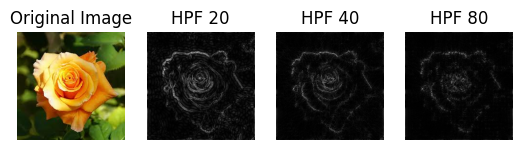

In [1]:
import matplotlib.pyplot as plt	
import cv2
import numpy as np

image = cv2.imread('1-Rose.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)
height, width, channel = image.shape

def inversed(image):
    f_ishift = np.fft.ifftshift(image)
    image_back_filter = np.fft.ifft2(f_ishift)
    image_back_filter = np.abs(image_back_filter)
    return image_back_filter

def high_pass_filter(rows, cols, cut_off):
    crow, ccol = rows // 2, cols // 2
    x,y = np.ogrid[:rows, :cols]
    mask = np.ones((rows, cols), np.float32)
    mask_area = (x-crow)**2 + (y-ccol)**2 <= cut_off**2
    mask[mask_area] = 0
    return mask

hpf_mask_20 = fshift * high_pass_filter(width, height, 20)
hpf_mask_20 = inversed(hpf_mask_20)
hpf_mask_40 = fshift * high_pass_filter(width, height, 40)
hpf_mask_40 = inversed(hpf_mask_40)
hpf_mask_80 = fshift * high_pass_filter(width, height, 80)
hpf_mask_80 = inversed(hpf_mask_80)

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(hpf_mask_20,cmap='gray')
plt.title('HPF 20')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(hpf_mask_40,cmap='gray')
plt.title('HPF 40')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(hpf_mask_80,cmap='gray')
plt.title('HPF 80')
plt.axis('off')


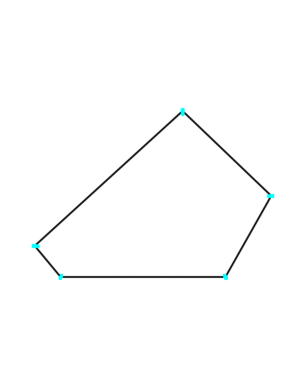

In [2]:
gif_path = "2-Pentagon.gif"

capture = cv2.VideoCapture(gif_path)
ret,frame = capture.read()

def haris_corner(image):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    corner = cv2.cornerHarris(gray,10,5,0.04)
    corner = cv2.dilate(corner,None)
    threshold = corner > 0.01*corner.max()
    image[threshold]= [0,255,255]

    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.axis('off')  
    
haris_corner(frame)


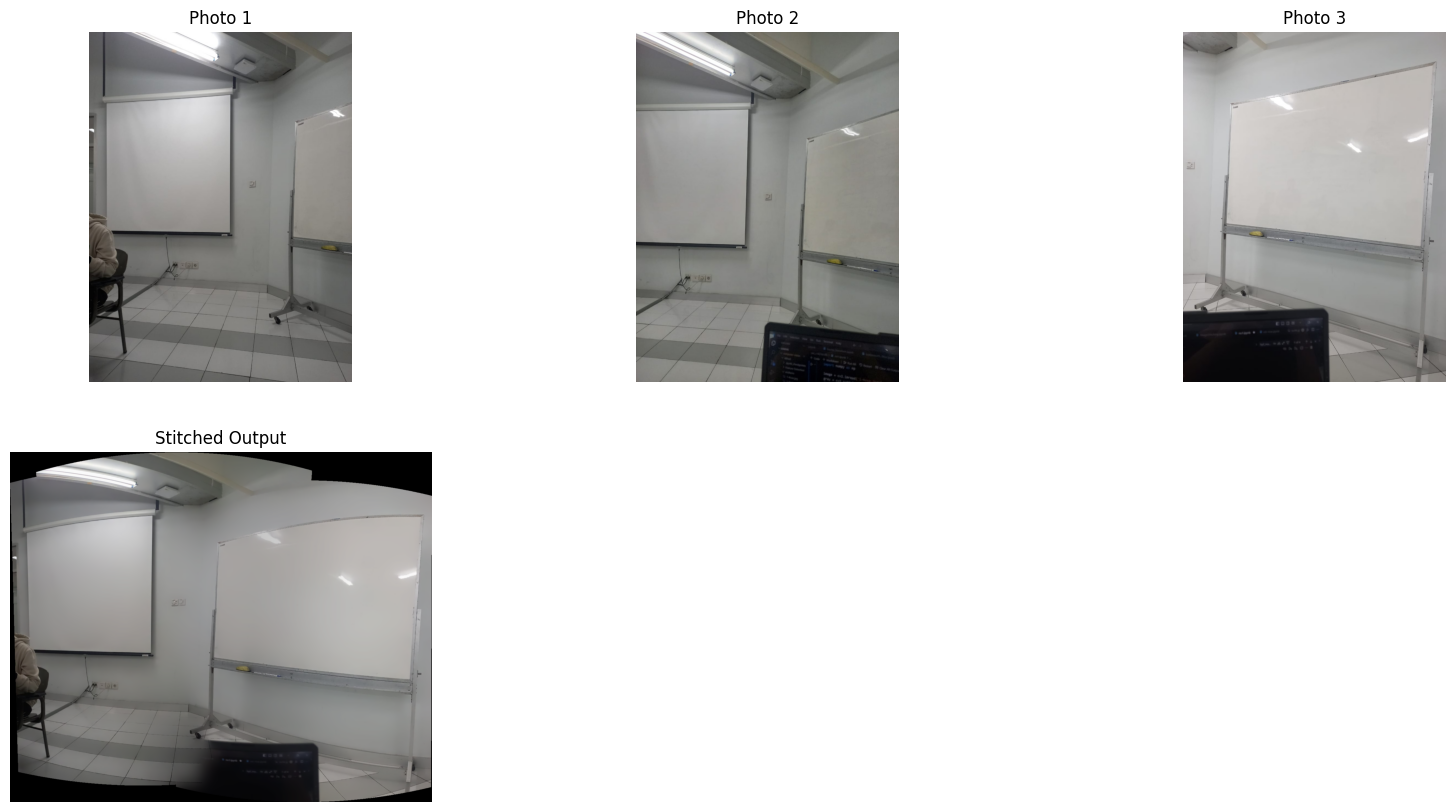

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def main():
    imagePaths = ["kiri.jpg", "depan.jpg", "kanan.jpg"]
    images = []

    for imagePath in imagePaths:
        image = cv2.imread(imagePath)
        images.append(image)

    stitcher = cv2.Stitcher_create() 
    (status, stitched) = stitcher.stitch(images)

    if status == cv2.Stitcher_OK:
        fig, axes = plt.subplots(2, len(images), figsize=(20, 10))
                
        for i, imagePath in enumerate(imagePaths):
            img = cv2.imread(imagePath)
            axes[0, i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axes[0, i].set_title(f"Photo {i+1}")

            axes[0, i].axis('off')
        
        output_img = cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB)
        axes[1, 0].imshow(output_img)
        axes[1, 0].set_title("Stitched Output")
        axes[1, 0].axis('off')

        for j in range(1, len(images)):
            fig.delaxes(axes[1, j])

        plt.show()

    else:
        print("image stitching failed ({})".format(status))

if __name__ == "__main__":
    main()
